<a href="https://colab.research.google.com/github/ddy623/Cirrhosis/blob/main/Cirrhosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
# from google.colab import drive
# drive.mount('/content/drive')


In [281]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
# Import datetime library
import datetime as dt

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

# Instantiate default KNN
knn = KNeighborsClassifier()
from sklearn.inspection import permutation_importance
import joblib
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
# set pandas to display more columns
pd.set_option('display.max_columns',50)
# Deep learning tols
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn import set_config
set_config(transform_output='pandas')

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



#Other Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output='pandas')

In [282]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [283]:
#Load Cirrhois Data
fpath = "/content/drive/MyDrive/CodingDojo/03-IntermediateMachineLearning/Week09/Data/cirrhosis.csv"
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Explore Data

In [284]:
len(df)

418

In [285]:
len(df.columns)

20

In [286]:
# save the filter
duplicated_rows = df.duplicated()
duplicated_rows

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [287]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

Drop Rows that contain Nan Values

In [288]:
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Check value counts of variables

In [289]:
df['Status'].value_counts()

C     232
D     161
CL     25
Name: Status, dtype: int64

In [290]:
df['Ascites'].value_counts()

N    288
Y     24
Name: Ascites, dtype: int64

In [291]:
df['Hepatomegaly'].value_counts()

Y    160
N    152
Name: Hepatomegaly, dtype: int64

In [292]:
df['Spiders'].value_counts()

N    222
Y     90
Name: Spiders, dtype: int64

In [293]:
df['Tryglicerides'].value_counts()

118.0    7
90.0     6
91.0     6
68.0     5
56.0     5
        ..
272.0    1
318.0    1
243.0    1
598.0    1
82.0     1
Name: Tryglicerides, Length: 146, dtype: int64

In [294]:
df['Cholesterol'].value_counts()

260.0    4
316.0    4
448.0    4
257.0    3
259.0    3
        ..
486.0    1
528.0    1
458.0    1
950.0    1
576.0    1
Name: Cholesterol, Length: 201, dtype: int64

In [295]:
df['Copper'].value_counts()

52.0     8
67.0     7
58.0     6
75.0     6
20.0     5
        ..
178.0    1
110.0    1
154.0    1
269.0    1
186.0    1
Name: Copper, Length: 158, dtype: int64

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [297]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [298]:
df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


Perform Exploratory Data

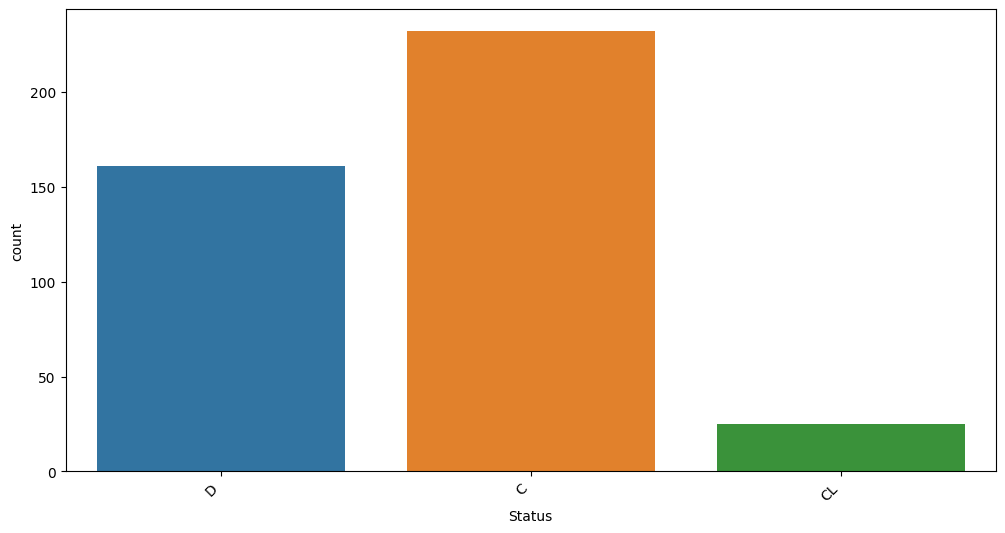

In [299]:
#Create a countplot for categorical data
# Seaborn countplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Status', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Preprocess the Data

In [300]:
## Define features (X) and target (y)
target = 'Status'
X = df.drop(columns = [target])
y = df[target]

In [301]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [302]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
impute_median.fit
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [303]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
        'Stage'],
       dtype='object'))

In [304]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
impute_na.fit(X_train[ohe_cols])
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [305]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))

In [306]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [307]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                  verbose_feature_names_out=False)

In [308]:
X_train_tf = col_transformer.transform(X_train)
# Transform the testing data
X_test_tf = col_transformer.transform(X_test)


In [309]:
y_train.isna().sum()

0

Confirm that there are no missing values

In [310]:
## Create an instance of the model
rfc = RandomForestClassifier(random_state=42)
## Create a model pipeline
rfc_pipe = make_pipeline(col_transformer, rfc)
rfc_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('categ...',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       1.00      1.00      1.00       177
          CL       1.00      1.00      1.00        19
           D       1.00      1.00      1.00       117

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313



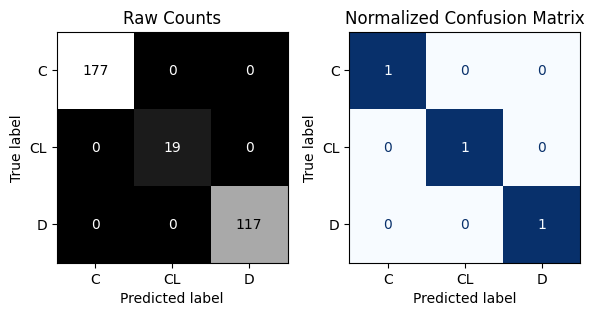


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.80      0.87      0.83        55
          CL       0.00      0.00      0.00         6
           D       0.78      0.80      0.79        44

    accuracy                           0.79       105
   macro avg       0.53      0.56      0.54       105
weighted avg       0.74      0.79      0.77       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


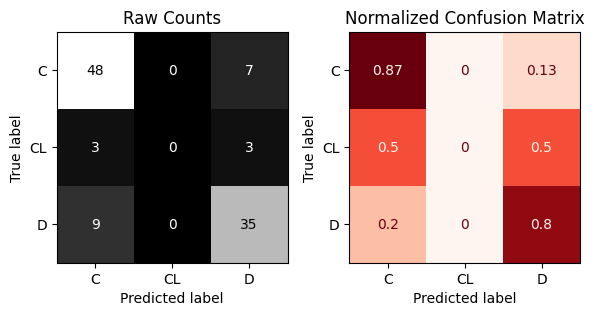

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [311]:
#Evaluate
evaluate_classification(rfc_pipe,X_train,y_train,X_test,y_test)

Permutation Importance

In [312]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax


Feature Engineering

Choose at least one feature selection or feature engineering method to apply to the data and compare the models’  performance with and without feature selection/engineering.

Some options include:
Apply PCA  to keep .85 variance ratio
Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).
Apply Clustering, select the appropriate number of clusters, and use the clustering object to get predicted clusters for the training and test data. Concatenate/combine these clusters with the original features.
Create additional features by applying the feature engineering techniques demoed on the LP.
Fit and evaluate a model using your updated/expanded features and compare it to your model from Part 1.
Apply at least one method of feature selection (filtering, embedded, wrapper).
Fit and evaluate a final model using the selected features.
Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4).
In a Markdown cell, comment on how these features compare to the model from Part 1. Are there any new features in the top 10?

PCA Model

In [313]:
# Instantiate & fit data using PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)
X_train_pca.head()



,pca0,pca1,pca2
132,-1.016664,0.170724,1.479857
60,-2.170320,1.708940,1.237276
198,0.227308,0.986525,-1.209412
332,-0.131382,-1.979842,-0.431594
63,0.676887,0.567233,1.141716


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       1.00      1.00      1.00       177
          CL       1.00      1.00      1.00        19
           D       1.00      1.00      1.00       117

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313



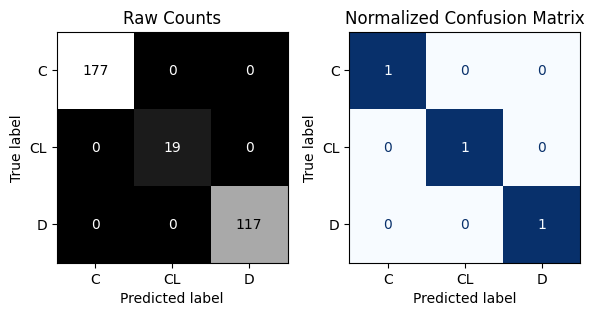


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.78      0.82      0.80        55
          CL       0.00      0.00      0.00         6
           D       0.76      0.77      0.76        44

    accuracy                           0.75       105
   macro avg       0.51      0.53      0.52       105
weighted avg       0.72      0.75      0.74       105



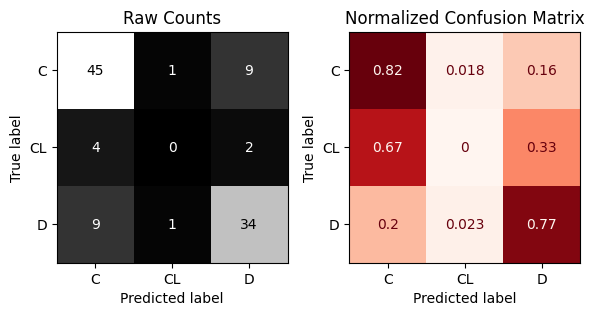

Training time was: 0:00:00.206436


In [314]:
# Record the start time
start = dt.datetime.now()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Record the end time and calc duration
end = dt.datetime.now()
dur_pca = end-start

evaluate_classification(clf, X_train_pca,y_train, X_test_pca, y_test)
print(f'Training time was: {dur_pca}')


In [315]:
# Define PCA to address 85% of the variance
pca85 = PCA(n_components=.85)
# fit and transform on training data
X_train_pca85 = pca85.fit_transform(X_train_tf)
# transform test data
X_test_pca85 = pca85.transform(X_test_tf)
# obtain the number of PCs used
pca85.n_components_



11

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       1.00      1.00      1.00       177
          CL       1.00      1.00      1.00        19
           D       1.00      1.00      1.00       117

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313



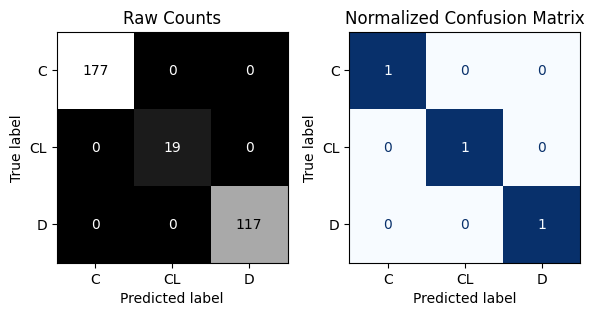


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.74      0.82      0.78        55
          CL       0.00      0.00      0.00         6
           D       0.75      0.75      0.75        44

    accuracy                           0.74       105
   macro avg       0.50      0.52      0.51       105
weighted avg       0.70      0.74      0.72       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


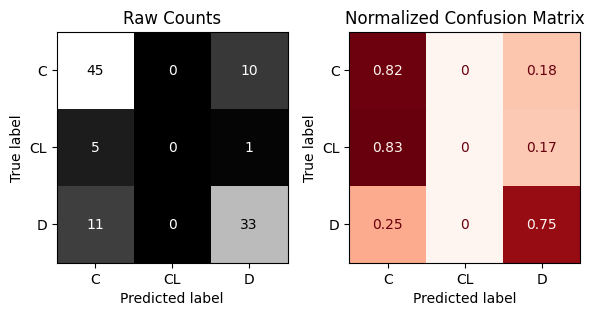

Training time was: 0:00:00.247559


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [316]:
# Record the start time
start = dt.datetime.now()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca85, y_train)

# Record the end time and calc duration
end = dt.datetime.now()
dur_pca_85 = end-start

evaluate_classification(clf, X_train_pca85,y_train, X_test_pca85, y_test)
print(f'Training time was: {dur_pca_85}')



Model without PCA

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       1.00      1.00      1.00       177
          CL       1.00      1.00      1.00        19
           D       1.00      1.00      1.00       117

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313



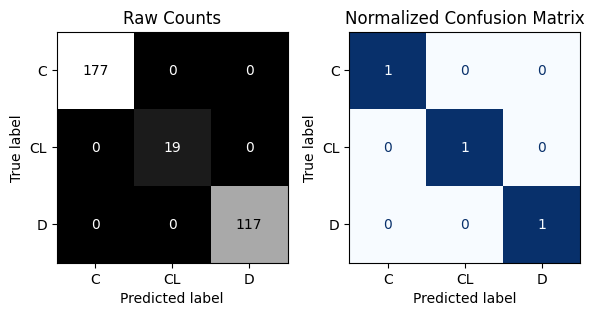


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.80      0.87      0.83        55
          CL       0.00      0.00      0.00         6
           D       0.78      0.80      0.79        44

    accuracy                           0.79       105
   macro avg       0.53      0.56      0.54       105
weighted avg       0.74      0.79      0.77       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


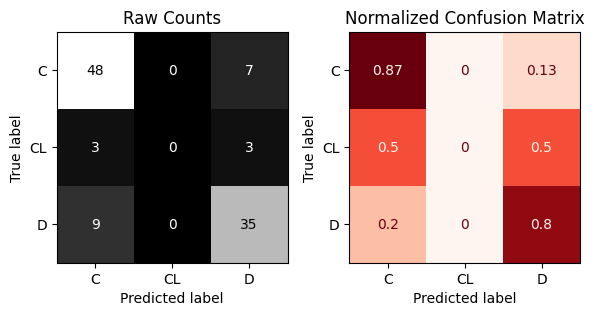

Training time was: 0:00:00.182431


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [317]:
# Import datetime library
import datetime as dt

# Record the start time
start = dt.datetime.now()

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_tf, y_train)

# Record the end time and calc duration
end = dt.datetime.now()
dur_baseline = end-start

evaluate_classification(clf, X_train_tf,y_train, X_test_tf, y_test)
print(f'Training time was: {dur_baseline}')



Feature Selection

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       1.00      1.00      1.00       177
          CL       1.00      1.00      1.00        19
           D       1.00      1.00      1.00       117

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313



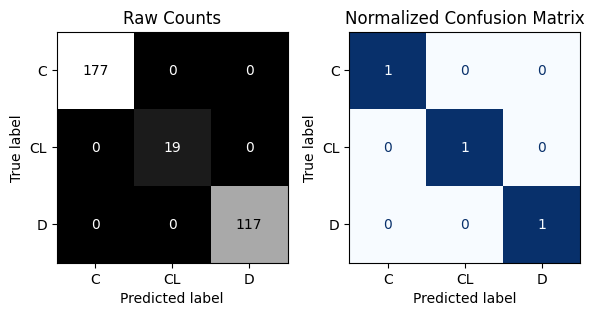


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.80      0.87      0.83        55
          CL       0.00      0.00      0.00         6
           D       0.78      0.80      0.79        44

    accuracy                           0.79       105
   macro avg       0.53      0.56      0.54       105
weighted avg       0.74      0.79      0.77       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


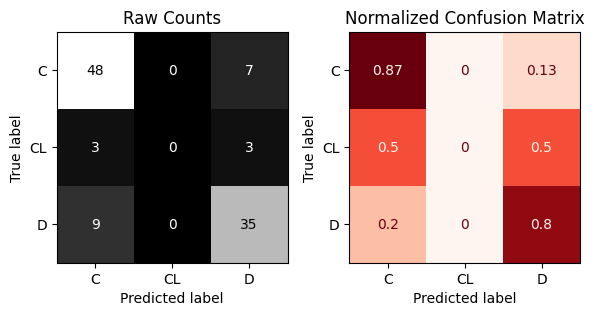

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [318]:
## Create an instance of the model
rfc = RandomForestClassifier(random_state=42)
## Create a model pipeline
rfc_pipe = make_pipeline(col_transformer, rfc)
rfc_pipe.fit(X_train, y_train)

# Evaluate with the custom function
evaluate_classification(rfc, X_train_tf,y_train, X_test_tf, y_test)

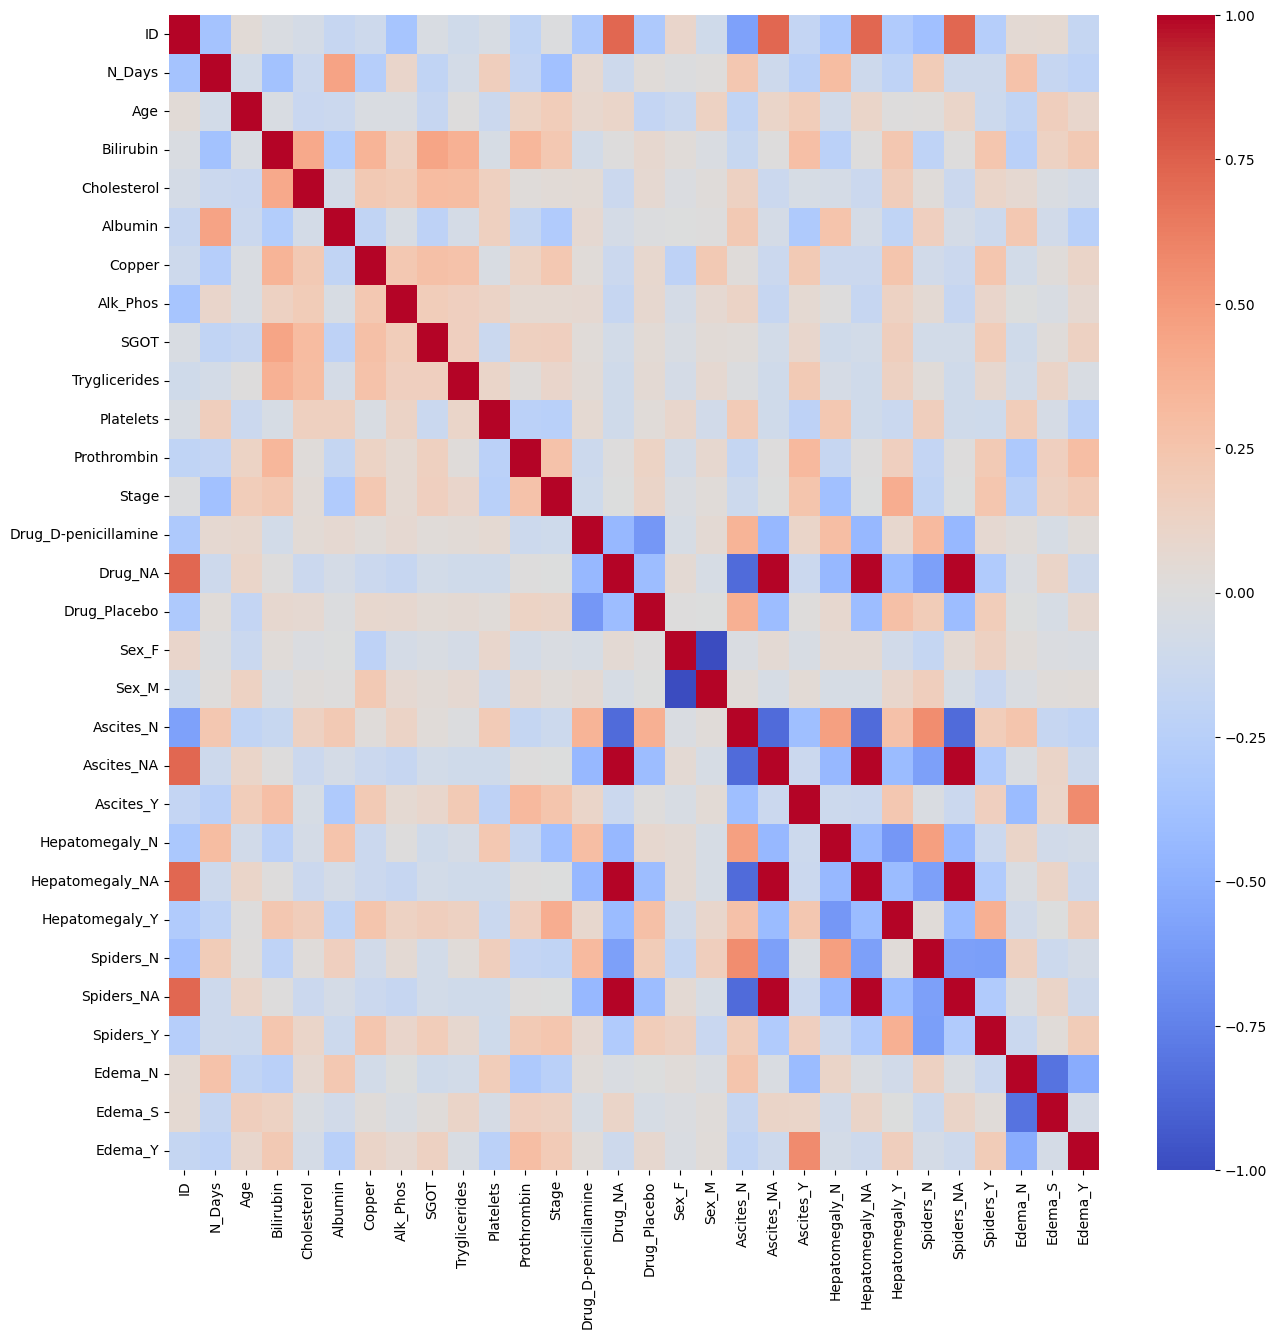

In [319]:
# Make a correlation heatmap of all features
corr = X_train_tf.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm');



Based upon the features shown in the correlation model, you are able to see that the there many features that play a role in Cirrhois of the liver.

Feature 1: Wrapper Method

In [320]:
# Instantiate the model
dt = DecisionTreeClassifier(random_state = 42)



In [321]:
# Instantiate the SequentialFeatureSelector
sfs = SequentialFeatureSelector(dt, n_features_to_select=10,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sfs.fit(X_train_tf,y_train)




SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=10, n_jobs=-1)

In [322]:
# Preview array
sfs.support_[0:5]


array([False, False, False, False, False])

In [323]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sfs.support_
# Only include the features selected
X_train_10 = X_train_tf.loc[:,features_to_keep]
X_test_10 = X_test_tf.loc[:,features_to_keep]
X_train_10.shape



(313, 10)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.85      0.94      0.89       177
          CL       0.86      0.32      0.46        19
           D       0.88      0.82      0.85       117

    accuracy                           0.86       313
   macro avg       0.86      0.69      0.73       313
weighted avg       0.86      0.86      0.85       313



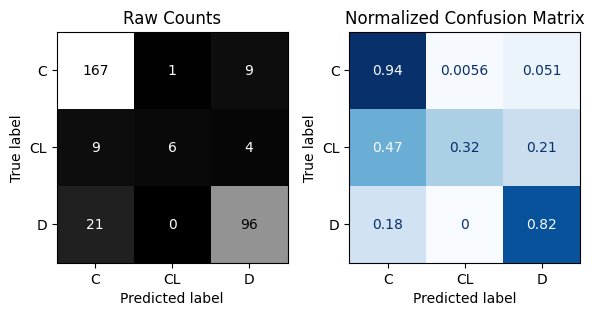


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.60      0.65      0.63        55
          CL       0.00      0.00      0.00         6
           D       0.54      0.50      0.52        44

    accuracy                           0.55       105
   macro avg       0.38      0.38      0.38       105
weighted avg       0.54      0.55      0.54       105



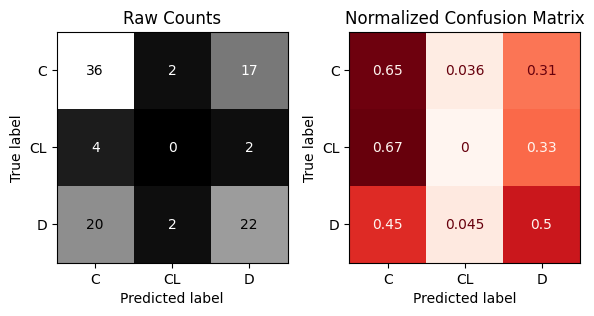

In [324]:
# Instantiate default random forest
rf_clf = RandomForestClassifier(random_state=42)
# Fit on 10 selected featuers
rf_clf.fit(X_train_10, y_train)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_10, y_train, X_test_10, y_test)

Using Feature Selection 2 Wrapper Method, using 10 features, accuracy goes to 55%

Permutation Importance

In [325]:
# Permutation importance takes a fit model and the test data.
r = permutation_importance(rf_clf, X_test_10, y_test,n_repeats =5, random_state = SEED)
r.keys()


dict_keys(['importances_mean', 'importances_std', 'importances'])

In [326]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_10.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances



Prothrombin        0.041905
Ascites_Y          0.009524
Drug_NA           -0.001905
Ascites_NA        -0.005714
Hepatomegaly_NA   -0.005714
Spiders_NA        -0.005714
Ascites_N         -0.009524
Edema_N           -0.030476
Edema_S           -0.034286
Stage             -0.045714
Name: permutation importance, dtype: float64

In [327]:
plot_importance = permutation_importances

In [328]:
ax = plot_importance(permutation_importances)
ax.set(xlabel='Permutation Importance');



TypeError: ignored

Project 4- Part 3

In [330]:
# Convert target to numbers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
y_train_enc



array([2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0,

In [331]:
# Convert encoded target values to a series
y_train_enc = pd.Series(le.transform(y_train), index=y_train.index,
             name=target)
y_test_enc = pd.Series(le.transform(y_test), index=y_test.index,
             name=target)
y_train_enc



132    2
60     0
198    0
332    2
63     2
      ..
71     0
106    0
270    0
348    0
102    2
Name: Status, Length: 313, dtype: int64

In [332]:
# Check class balance
y_train_enc.value_counts(normalize = True)


0    0.565495
2    0.373802
1    0.060703
Name: Status, dtype: float64

In [333]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_tf.shape[1]
input_shape


30

In [334]:
# Sequential model
model = Sequential()


In [335]:
# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?



In [336]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))



In [337]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam',)



In [338]:
# Reviewing the model summary before training
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 30)                930       
                                                                 
 dense_20 (Dense)            (None, 10)                310       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1251 (4.89 KB)
Trainable params: 1251 (4.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [339]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train_enc,
                    validation_split=.2,
                    epochs=50)






Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 0.8736 - val_loss: 0.8004
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7634 - val_loss: 0.7213
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6845 - val_loss: 0.6669
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6337 - val_loss: 0.6216
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5900 - val_loss: 0.5778
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5441 - val_loss: 0.5332
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5008 - val_loss: 0.4845
Epoch 8/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4505 - val_loss: 0.4320
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3949 - val_loss: 0.3784
Epoch 10/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3382 - val_loss: 0.3185
Epoch 11/50
8/8 [=====================

In [340]:
# History.history is a dictionary
history.history.keys()



dict_keys(['loss', 'val_loss'])

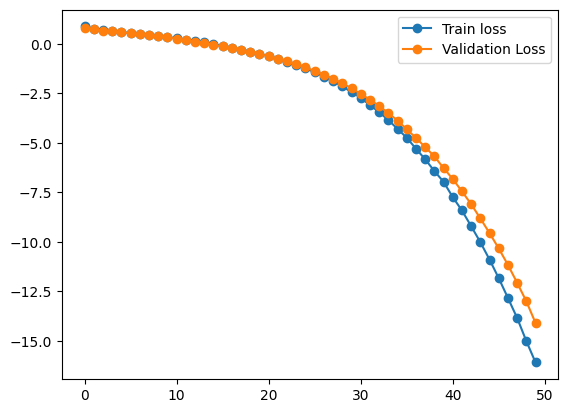

In [341]:
# Visualize the loss
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train loss', marker='o')
ax.plot(history.history['val_loss'], label='Validation Loss', marker='o')
ax.legend();



Evaluate the Model

In [342]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_tf, y_test_enc,return_dict=True)
result



4/4 [==============================] - 0s 5ms/step - loss: -21.9931


{'loss': -21.993141174316406}

In [343]:
# make predictions
y_pred_test = model.predict(X_test_tf)
y_pred_test[:5]



4/4 [==============================] - 0s 3ms/step


array([[0.997633  ],
       [1.        ],
       [0.99996525],
       [1.        ],
       [1.        ]], dtype=float32)

In [344]:
# round the predictions
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]



array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        55
           1       0.06      0.83      0.12         6
           2       0.00      0.00      0.00        44

    accuracy                           0.27       105
   macro avg       0.32      0.42      0.23       105
weighted avg       0.47      0.27      0.30       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


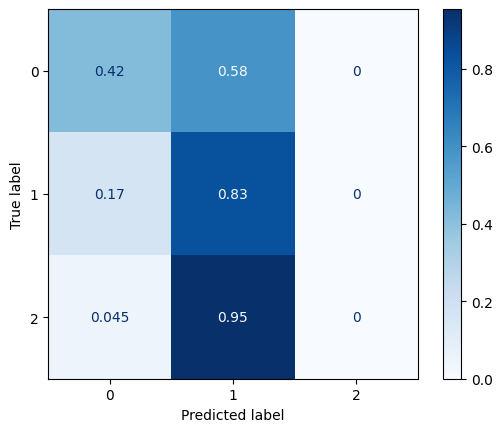

In [345]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test_enc, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred_test, cmap='Blues',
                                       normalize='true');



Keras Tuner

In [346]:
# Build and Compile Model within a function
def build_model():
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
    return model



In [347]:
# Call our build function to build model
basic_model = build_model()

# Get model summary
basic_model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 19)                589       
                                                                 
 dense_23 (Dense)            (None, 10)                200       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 800 (3.12 KB)
Trainable params: 800 (3.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [348]:
# Build and Compile Model within a function to try optimizers
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model



In [349]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

